Emotion Detection

#Importing Libraries

In [1]:
import matplotlib.pyplot as plt
from glob import glob #create a list of all the files present in a directory
import cv2
import random
import os
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

In [3]:
from tensorflow.keras.models import Model, Sequential

In [4]:
from tensorflow.keras.optimizers import Adam

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model


from IPython.display import SVG, Image 
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.19.0


**Exploring Dataset**

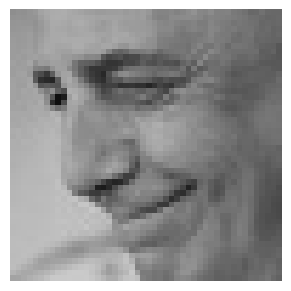

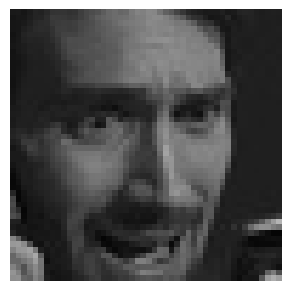

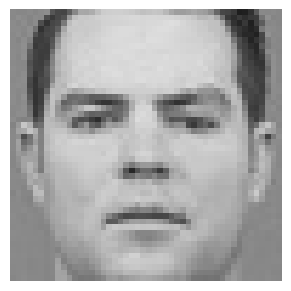

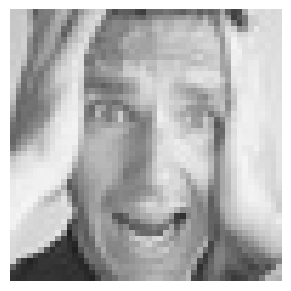

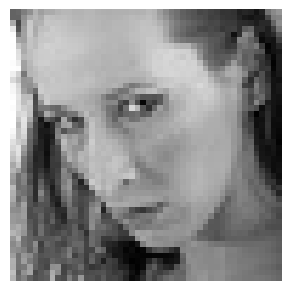

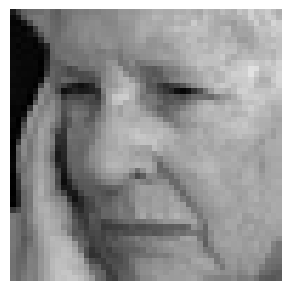

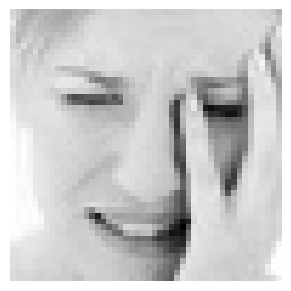

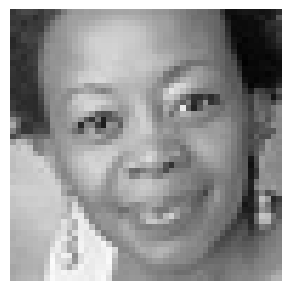

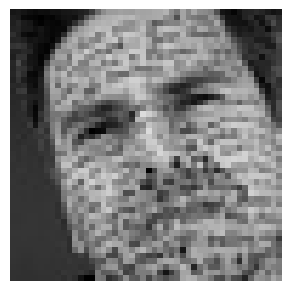

In [6]:
images = glob("train/**/**")#list of all the images present in train directory
for i in range(9):
    image = random.choice(images)#prints any random images from list that glob has made
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)#random number so that no overlapping occurs
    plt.imshow(cv2.imread(image)); plt.axis('off')

**Preparing Data For Training**

In [7]:
img_size = 48#48*48 pixels
batch_size = 64#hyperparameter which you can give any number
datagen_train = ImageDataGenerator()#imported while importing libraries
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",#only seven to print
                                                   shuffle = True#sends different images not only happy
                                                   )#all files are present in different different files
daragen_validation = ImageDataGenerator()#imported while importing libraries
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",#only seven to print
                                                   shuffle = True#sends different images not only happy
                                                   )#all files are present in different different files


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [8]:
#Create 2 layers or 2 functions
def Convolution(input_tensor, filters, kernel_size):#variables we'll be using while defining 
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)#definign number of filters it has to find to detect what image it is
    x = BatchNormalization()(x)#to remove overfitting and get the training process smoothly
    x = Activation('relu')(x)#other activation function like Tanh sigmoid etc
    x = MaxPooling2D(pool_size = (2,2))(x)#MaxPooling2D is to decrease the dimensions of the data so that the training can be done smoothly
    x = Dropout(0.25)(x)#remove overfitting

    return x

In [9]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)#creating a dense layer which has nodes that have to pass
    x = BatchNormalization()(x)#to overcome overfitting
    x =  Activation('relu')(x)
    x = Dropout(0.25)(x)

    return x

In [10]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32,(3,3))
    conv_2 = Convolution(inputs, 64,(5,5))
    conv_3 = Convolution(inputs, 128,(6,6))

    flatten = Flatten()(conv_3)#flatten the output so that we can pass the output we get from conv layer to dense layer

    dense_1 = Dense_f(flatten, 256)

    output = Dense(7,activation = "softmax")(dense_1)#As we have 7 classes so the output should be an array of size 7
    model = Model(inputs = [inputs], outputs = [output])

    model.compile(loss =['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])


    return model

In [11]:
model =  model_fer((48,48,1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,882,695 (72.03 MB)

 Trainable params: 18,881,927 (72.03 MB)

 Non-trainable params: 768 (3.00 KB)

**Initialising Our Model**

In [12]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size#we are using // so that it uses interger number

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor = 'val_accuracy', save_weights_only = True, mode = 'max' , verbose = 1)
callbacks = [checkpoint]#modal checkpoints so it contains weight contains all model checpoints


** TRAINING MODEL **

In [ ]:
history = model.fit(
    x= train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

C:\Users\Swanee Prakash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.3247 - loss: 1.8280
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 522s 1s/step - accuracy: 0.3248 - loss: 1.8277 - val_accuracy: 0.3429 - val_loss: 1.6530
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:36 483ms/step - accuracy: 0.4688 - loss: 1.6160

C:\Users\Swanee Prakash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.4688 - loss: 1.6160 - val_accuracy: 0.3371 - val_loss: 1.6571
Epoch 3/15
 14/448 ━━━━━━━━━━━━━━━━━━━━ 6:58 965ms/step - accuracy: 0.4561 - loss: 1.4026

**Evaluate the Model**

In [14]:
model.evaluate(train_generator)

449/449 ━━━━━━━━━━━━━━━━━━━━ 285s 636ms/step - accuracy: 0.7848 - loss: 0.6562


[0.6547240018844604, 0.7846668362617493]

In [15]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.4779 - loss: 1.5135


[1.5359952449798584, 0.473251610994339]

**Plotting Loss**

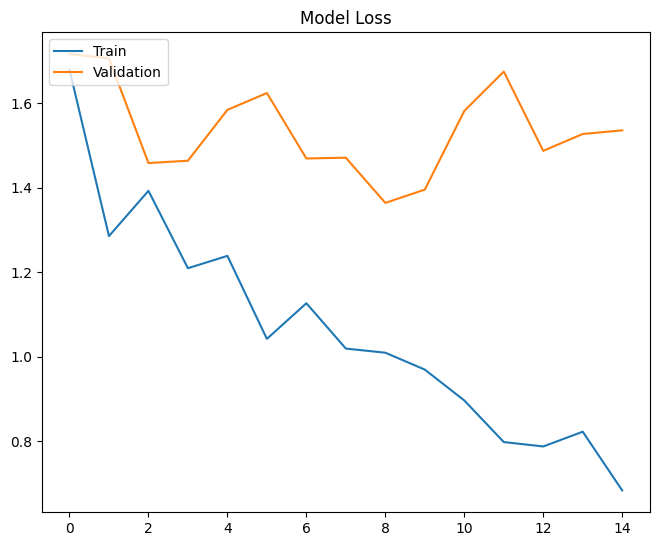

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom =0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace=0.35)

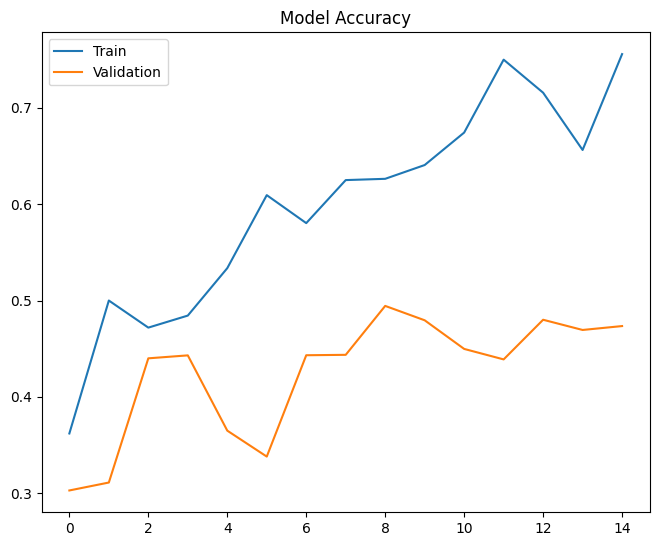

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom =0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace=0.35)

**Save model architecture**

In [18]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)   